Q6. Complete the function edge_detection(img) that takes an image as input and performs the 
following steps:  
• Normalizes the image to [0,1] range. 
• Applies Gaussian smoothing with standard deviation 0.5  
• Computes the gradient magnitude and angle images. 
• Applies non-maximal suppression to the gradient magnitude image. For 
non-maximum suppression, discretize the angle into 8 directions (or bins), where each 
bin accounts for 45 degrees. For example, first bin would range from [-22.5,22.5] 
degrees, second bin would range from [22.5,67.5] degrees, and so on.  
• Returns the gradient magnitude image, angle image and gradient image after 
non-maximal suppression. 
Call the edge_detection(img) function with the coins image. Display the input image and 
all three output images from your edge_detection function.  
**Note:** You may use built-in functions for performing Gaussian filtering and convolution 
operation. 

In [1]:
# Importing all the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt 

(152, 192)


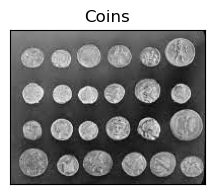

In [2]:
img = cv2.imread("coins.jpeg", cv2.IMREAD_GRAYSCALE)# Reading the image coins in gray scale
print(img.shape)# printing shape of the image coins
plt.figure(figsize=(3,2))
plt.title("Coins")
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
    


**Sobel**
<img src="Screenshot 2024-09-20 220753.png" style = "height:50%;width:40%"/>


In [3]:
def edge_detection(image):
    normalized_img = image/255.0 # normalizing the image in range of 0 to 1 also including decimal values
    gaussian_img = cv2.GaussianBlur(normalized_img,(19,19),0.5)

    
    # # computing gradients along the x and y axis, respectively
    gX_1 = cv2.Sobel(gaussian_img, cv2.CV_64F, 1, 0) # Using sobel operation to calculate gradients
    gY_1 = cv2.Sobel(gaussian_img, cv2.CV_64F, 0, 1)

    gX_1 = cv2.convertScaleAbs(gX_1) #converting gradients to [0,255] range because sobel can return values outside the boundary (unsigned 8 bits)
    gY_1 = cv2.convertScaleAbs(gY_1)

    # computing the gradient magnitude and orientation(gradient angle)
    magnitude = np.sqrt((gX_1 ** 2) + (gY_1 ** 2))
    orientation = np.arctan2(gY_1, gX_1) * (180 / np.pi) % 180

    nms_gradient = maximum(magnitude,orientation) # calculating non maximum supression

    (fig, axs) = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
    # plotting each of the images
    axs[0].imshow(image, cmap="gray")
    axs[1].imshow(gaussian_img, cmap="gray")
    axs[2].imshow(magnitude, cmap="gray")
    axs[3].imshow(orientation, cmap="gray")
    axs[4].imshow(nms_gradient, cmap="gray")
    # set the titles of each axes
    axs[0].set_title("Grayscale")
    axs[1].set_title("Normalized Gaussian")
    axs[2].set_title("Gradient Magnitude")
    axs[3].set_title("Gradient Orientation[0, 180]")
    axs[4].set_title("NMS Gradient")
    # loop over each of the axes and turn off the x and y ticks
    for i in range(0, 5):
        axs[i].get_xaxis().set_ticks([])
        axs[i].get_yaxis().set_ticks([])
    # show the plots
    plt.tight_layout()
    plt.show()

    return magnitude,orientation,nms_gradient

# Defining non maximum suppression
def maximum(det, phase):  #det means gradient magnitude and phase is basically gradient angle tan^-(gy/gx)
  gmax = np.zeros(det.shape) # initializing new array same shape as gradient magnitude in which we will keep our NMS output
  for i in range(gmax.shape[0]): # as it has same shape as gradient mag, we basically traversing throuh each rows and coulms of gmax
    for j in range(gmax.shape[1]):
      if phase[i][j] < 0:  # if angle is negative we make it +ve means greateer than 360
        phase[i][j] += 360

      if ((j+1) < gmax.shape[1]) and ((j-1) >= 0) and ((i+1) < gmax.shape[0]) and ((i-1) >= 0): # ensuring that only interior pixels will be considered.
        '''Check if pixel is local maximum along gradient direction. 
            Zero out pixel whose magnitude is less than its 
            neighbour’s along the gradient direction.'''
        '''If the pixel has the maximum gradient magnitude in its direction, it is retained; otherwise, it's suppressed (set to zero).'''
        # 0 degrees
        if (phase[i][j] >= 337.5 or phase[i][j] < 22.5) or (phase[i][j] >= 157.5 and phase[i][j] < 202.5):
          if det[i][j] >= det[i][j + 1] and det[i][j] >= det[i][j - 1]: # As it is for near horizontal line ( -22.5 to 22.5 ) we are checking its left and right pixels
            gmax[i][j] = det[i][j]
        # 45 degrees
        if (phase[i][j] >= 22.5 and phase[i][j] < 67.5) or (phase[i][j] >= 202.5 and phase[i][j] < 247.5):
          if det[i][j] >= det[i - 1][j + 1] and det[i][j] >= det[i + 1][j - 1]: # top right and bottom left
            gmax[i][j] = det[i][j]
        # 90 degrees
        if (phase[i][j] >= 67.5 and phase[i][j] < 112.5) or (phase[i][j] >= 247.5 and phase[i][j] < 292.5):
          if det[i][j] >= det[i - 1][j] and det[i][j] >= det[i + 1][j]: # top left and bottom right
            gmax[i][j] = det[i][j]
        # 135 degrees
        if (phase[i][j] >= 112.5 and phase[i][j] < 157.5) or (phase[i][j] >= 292.5 and phase[i][j] < 337.5):
          if det[i][j] >= det[i - 1][j - 1] and det[i][j] >= det[i + 1][j + 1]: # up and down
            gmax[i][j] = det[i][j]
  return gmax

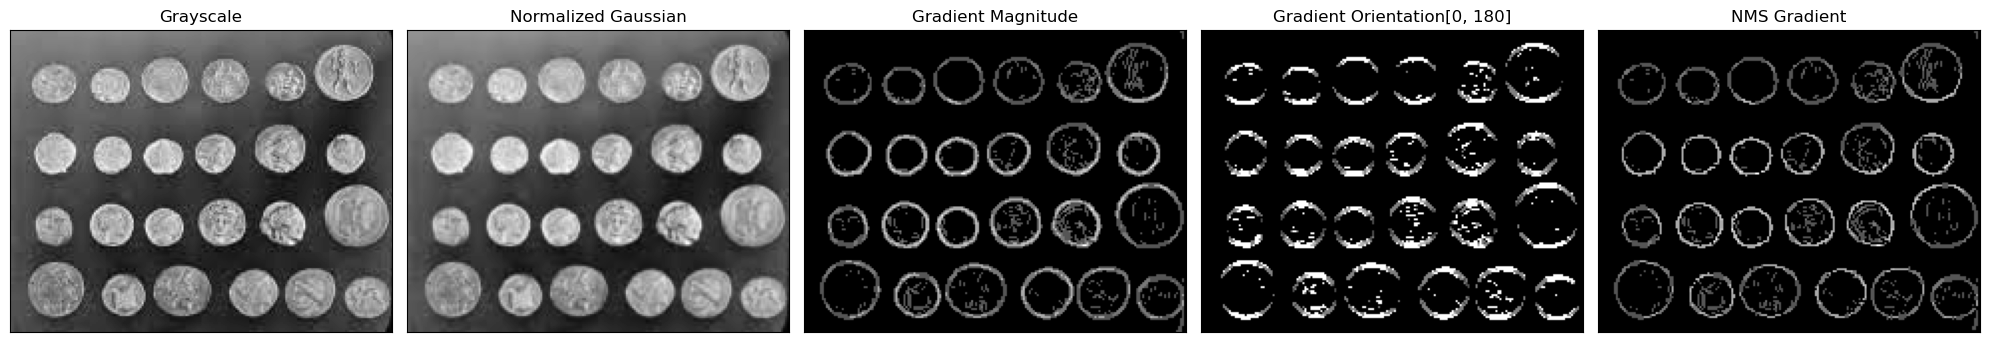

(array([[0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float16),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float16),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [4]:
edge_detection(img)

In [5]:
# # set the kernel size, depending on whether we are using the Sobel
# # filter or the Scharr operator, then compute the gradients along
# # the x and y axis, respectively
# ksize = 3
# gX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
# gY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
# # the gradient magnitude images are now of the floating point data
# # type, so we need to take care to convert them back a to unsigned
# # 8-bit integer representation so other OpenCV functions can operate
# # on them and visualize them
# gX = cv2.convertScaleAbs(gX)
# gY = cv2.convertScaleAbs(gY)
# # combine the gradient representations into a single image
# combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
# # show our output images
# plt.figure(figsize=(8,4))
# plt.subplot(1,3,1)
# plt.title("Sobel/Scharr X")
# plt.imshow(gX, cmap='gray')
# plt.xlabel("ksize = 3")
# plt.xticks([])
# plt.yticks([])


# plt.subplot(1,3,2)
# plt.title("Sobel/Scharr Y")
# plt.imshow(gY,cmap='gray')
# plt.xlabel("ksize = 3")
# plt.xticks([])
# plt.yticks([])

# plt.subplot(1,3,3)
# plt.title("Sobel/Scharr Combined")
# plt.imshow(combined,cmap='gray')
# plt.xlabel("ksize = 3")
# plt.xticks([])
# plt.yticks([])

# plt.tight_layout()
# plt.show()
# # cv2.imshow("Sobel/Scharr X", gX)
# # cv2.imshow("Sobel/Scharr Y", gY)
# # cv2.imshow("Sobel/Scharr Combined", combined)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [6]:
# # set the kernel size, depending on whether we are using the Sobel
# # filter or the Scharr operator, then compute the gradients along
# # the x and y axis, respectively
# ksize = -1
# gX = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
# gY = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
# # the gradient magnitude images are now of the floating point data
# # type, so we need to take care to convert them back a to unsigned
# # 8-bit integer representation so other OpenCV functions can operate
# # on them and visualize them
# gX = cv2.convertScaleAbs(gX)
# gY = cv2.convertScaleAbs(gY)
# # combine the gradient representations into a single image
# combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)
# # show our output images
# plt.figure(figsize=(8,4))
# plt.subplot(1,3,1)
# plt.title("Sobel/Scharr X")
# plt.imshow(gX, cmap='gray')
# plt.xlabel("ksize = -1")
# plt.xticks([])
# plt.yticks([])


# plt.subplot(1,3,2)
# plt.title("Sobel/Scharr Y")
# plt.imshow(gY,cmap='gray')
# plt.xlabel("ksize = -1")
# plt.xticks([])
# plt.yticks([])

# plt.subplot(1,3,3)
# plt.title("Sobel/Scharr Combined")
# plt.imshow(combined,cmap='gray')
# plt.xlabel("ksize = -1")
# plt.xticks([])
# plt.yticks([])

# plt.tight_layout()
# plt.show()
# # cv2.imshow("Sobel/Scharr X", gX)
# # cv2.imshow("Sobel/Scharr Y", gY)
# # cv2.imshow("Sobel/Scharr Combined", combined)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

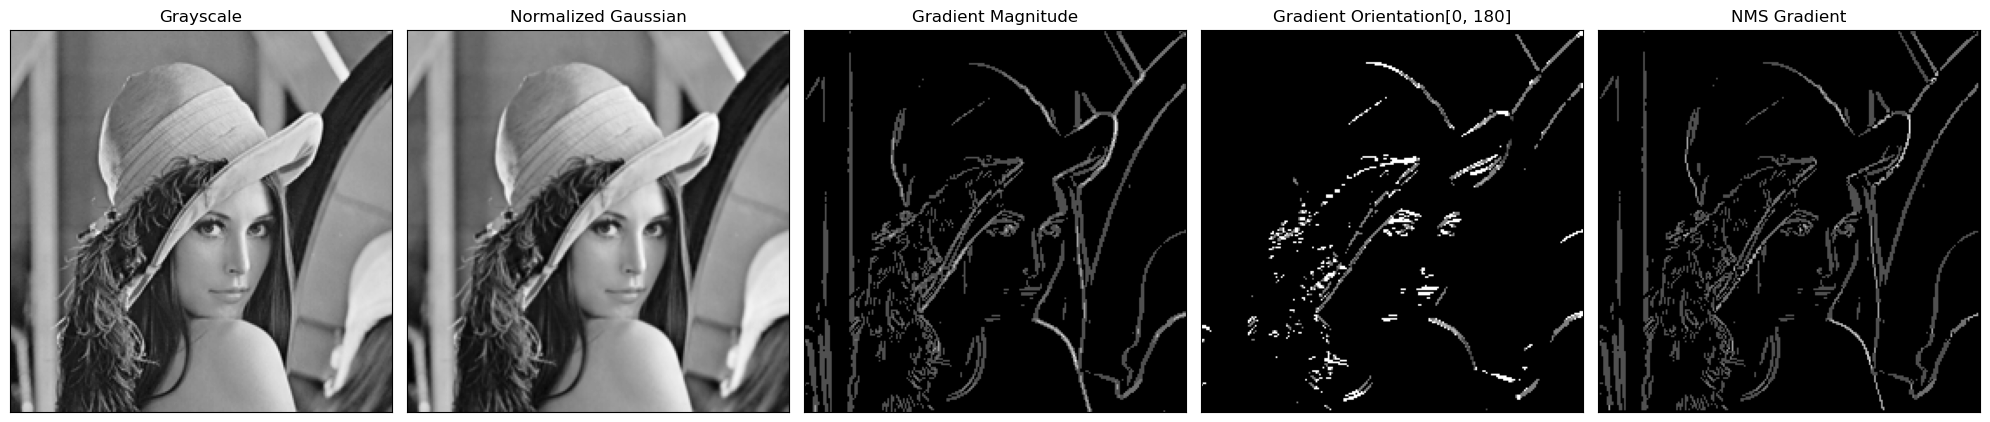

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 1., 1., 2.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float16),
 array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  , 89.94, 89.94],
        [ 0.  ,  0.  ,  0.  , ..., 89.94, 89.94, 89.94],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]], dtype=float16),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [7]:
img_2 = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)
edge_detection(img_2)